In [3]:
from docx import Document
import os
import pickle

### Import SOPs

In [4]:
path = "/Users/Public/Desktop/SOPs/"
SOPs = os.listdir(path)

In [5]:
print("Total number of SOPs : {}".format(len(SOPs)))

Total number of SOPs : 2021


In [6]:
corpus = ""

In [7]:
for ms_doc in SOPs:
    file_path = path+ms_doc
    for par in Document(file_path).paragraphs:
        corpus = corpus + " " + par.text

KeyboardInterrupt: 

### Save Corpus

In [6]:
with open("corpus.pickle",'wb') as f:
    pickle.dump(corpus, f)
    
f.close()

### Load Corpus

In [8]:
with open("corpus.pickle", 'rb') as f:
    corpus = pickle.load(f)

### SOP to text

In [15]:
def para_to_text(p):
    """
    A function to find every texts in the paragraph

    params
    ----
    p : docx.Document.Paragraph object

    returns
    ----
    str 

    """
    rs = p._element.xpath(".//w:t")
    return u"".join([r.text for r in rs])


def sop_to_text(file_path):
    """
    Converts SOP.docx into plain text

    params
    ----
    file_path : str (path to the SOP document) 

    returns
    ----
    str
    """
    text = []
    with open(file_path, 'rb') as f:
        source_stream = BytesIO(f.read())
    f.close()

    doc = Document(source_stream)
    paras = doc.paragraphs
    for p in paras:
        text.append(para_to_text(p))
            
    text = " ".join(text).strip()
    return text

### Spacy NER

In [10]:
import spacy
from spacy import displacy
from collections import Counter
from spacy.pipeline import EntityRuler
import random
from io import StringIO, BytesIO

## Rule based

#### Baseline model: en_core_web_sm

In [11]:
nlp = spacy.load("en_core_web_sm")

In [12]:
# # Randomly choose SOP
# n = random.randint(0,len(SOPs)-1)
# file_path = path+SOPs[n]
file_path = path + "BI - SHOPL - Shoplifter.docx"

text = sop_to_text(file_path)

doc1 = nlp(text)
displacy.render(nlp(str(doc1)), jupyter=True, style='ent' )

#### Rule Based Model

In [13]:
nlp = spacy.load("en_core_web_sm")
ruler = EntityRuler(nlp).from_disk("./entity_train/PATTERNS.JSONL")
nlp.add_pipe(ruler, before="ner")

In [14]:
# Disable baseline ner
nlp.disable_pipes('ner')

[('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x1c95e4ea9a8>)]

In [ ]:
# Save Model
nlp.to_disk("./entity_train/ecomm_ner")

In [11]:
nlp = spacy.load("./entity_train/ecomm_ner/")

In [12]:
colors = {"EVENT": "#FFCB41",
         "SITUATION": "#C7FF7E",
         "ACTION": "#FF625F",
         "QUESTION": "#D89CFF",
         "ROLE": "#7DC9FF" ,
         "CONDITION": "#FBB9F6" ,
         }
options = {"colors":colors}

In [16]:
file_path = path + "AB - ALARMD - Domestic violence alarm.docx"

text = sop_to_text(file_path)

doc = nlp(text)
displacy.render(nlp(str(doc)), jupyter=True, style='ent', options=options)

In [19]:
file_path = path + "AB - PROP - Property lost, found or seized.docx"

text = sop_to_text(file_path)

doc = nlp(text)
displacy.render(nlp(str(doc)), jupyter=True, style='ent', options=options)


In [20]:
# # Randomly choose SOP
# n = random.randint(0,len(SOPs)-1)
# file_path = path+SOPs[n]
file_path = path + "BI - SHOPL - Shoplifter.docx"

text = sop_to_text(file_path)

doc1 = nlp(text)
displacy.render(nlp(str(doc1)), jupyter=True, style='ent', options=options)


In [21]:
# # Randomly choose SOP
# n = random.randint(0,len(SOPs)-1)
# file_path = path+SOPs[n]
file_path = path + "VA - SHOPL - Shoplifter.docx"

text = sop_to_text(file_path)

doc2 = nlp(text)
displacy.render(nlp(str(doc2)), jupyter=True, style='ent', options=options)


In [22]:
file_path = path + "SX - SHOPL - Shoplifter.docx"

text = []
with open(file_path, 'rb') as f:
    source_stream = BytesIO(f.read())
f.close()
doc3 = Document(source_stream)
paras = doc3.paragraphs
for p in paras:
    text.append(p.text)
        
text = " ".join(text).strip()

doc3 = nlp(text)
displacy.render(nlp(str(doc3)), jupyter=True, style='ent' )

In [23]:
doc1.ents

(SHOPL – Shoplifter,
 call taker,
 Adult or juvenile - Trouble holding,
 Create,
 Upgrade,
 Where is the suspect being held?,
 Run,
 Attach,
 Juvenile – No trouble holding,
 Create,
 Where is the suspect being held?,
 Run,
 Attach,
 No Photo ID – No trouble holding,
 Create,
 Where is the suspect being held?,
 Run,
 Attach,
 Make,
 Adult – No trouble holding and LPO pressing charges,
 Create,
 Where is the suspect being held?,
 Run,
 Attach,
 Adult – No trouble holding and LPO not pressing charges,
 Run,
 If suspect has an enforceable CPIC entry or special interest to police,
 Create,
 Where is the suspect being held?,
 Advise,
 If suspect does not have an enforceable CPIC entry including those with extensive theft histories in PRIME,
 Advise,
 Dispatcher,
 Adult or juvenile - Trouble holding,
 Assign,
 Juvenile – No trouble holding,
 Assign,
 No Photo ID – No trouble holding,
 Assign,
 Adult – No trouble holding and LPO pressing charges,
 Assign,
 Adult – No trouble holding and LPO no

In [24]:
doc2.ents

(SHOPL – Shoplifter,
 call taker,
 If the suspect has recently fled the scene, was the stolen product retrieved?,
 Refer,
 SUSPP,
 Refer,
 THEFTI,
 Theft,
 In Progress,
 Trouble Holding Suspect,
 Create,
 Upgrade,
 Where is the suspect being held?,
 Run,
 Attach,
 Suspect is Juvenile (under the age of 16),
 Create,
 Where is the suspect being held?,
 Run,
 Attach,
 Suspect has no Photo Identification,
 Create,
 Where is the suspect being held?,
 Run,
 Attach,
 Make,
 LPO Pressing Charges,
 Create,
 Where is the suspect being held?,
 Run,
 Attach,
 LPO Not Pressing Charges,
 Run,
 Advise,
 Advise,
 Create,
 WARRAN,
 BREACH,
 If suspect does not have an enforceable CPIC entry including those with extensive theft histories in PRIME,
 Advise,
 central dispatcher,
 Trouble holding the suspect,
 Broadcast,
 Dispatcher,
 Trouble Holding Suspect,
 Assign,
 Suspect is Juvenile (under the age of 16),
 Assign,
 Suspect has no Photo Identification,
 Assign,
 LPO Pressing Charges,
 Assign)

In [25]:
doc3.ents

(SHOPL – Shoplifter,
 call taker,
 Adult or juvenile - Trouble holding,
 Create,
 Upgrade,
 Where is the suspect being held?,
 Run,
 Attach,
 Juvenile – No trouble holding,
 Create,
 Where is the suspect being held?,
 Run,
 Attach,
 No Photo ID – No trouble holding,
 Create,
 Where is the suspect being held?,
 Run,
 Attach,
 Make,
 Adult – No trouble holding and LPO pressing charges,
 Create,
 Where is the suspect being held?,
 Run,
 Attach,
 Adult – No trouble holding and LPO not pressing charges,
 Run,
 If suspect has an enforceable CPIC entry or special interest to police,
 Create,
 Where is the suspect being held?,
 Advise,
 If suspect does not have an enforceable CPIC entry including those with extensive theft histories in PRIME,
 Advise,
 Dispatcher,
 Adult or juvenile - Trouble holding,
 Assign,
 Juvenile – No trouble holding,
 Assign,
 No Photo ID – No trouble holding,
 Assign,
 Adult – No trouble holding and LPO pressing charges,
 Assign,
 Adult – No trouble holding and LPO no

#### Similarity between Documents


> Calculated by taking cosine similarity between averages of word vectors from two documents

In [26]:
doc1.similarity(doc2)

C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


0.9801934402130461

In [27]:
doc1.similarity(doc3)

C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


0.9998422795176239

## NER Training

> Spacy requires training data to be in the following format:

```python

train_data = [
    
    ("SENTENCES BLABLABLA", {entities : [(entity start index, entity end index, "LABEL A"),
                                         (entity start index, entity end index, "LABEL B")]})
    
    
]

```


In [28]:
x = "This is Jaekeun Lee"
x.find("Jaekeun")

8

In [29]:
import os
import json
from docx import Document
from io import StringIO, BytesIO
import re

event_type_train_data = []


def parse_docx_dict(filepath):
    
    
    with open(filepath, 'rb') as f:
        source_stream = BytesIO(f.read())
    f.close()
    doc = Document(source_stream)
    paras = doc.paragraphs
    for p in paras:
        style = p.style.name
        text = p.text
        if style == 'Normal':
            return text
        else:
            return ValueError
            

In [30]:
for ms_doc in SOPs:
    file_path = path+ms_doc
    call = file_path.split(" - ")[1].strip().replace(".docx","").split(" ")
    event_type, detail = call[0].strip(), " ".join(call[1:])

    summary = parse_docx_dict(file_path)
    
    start_ind = summary.find(event_type)
    end_ind = start_ind + len(event_type) - 1
    
    event_type_train_data.append((summary, {"entities": [(start_ind, end_ind, "EVENT_TYPE")]}))

AttributeError: type object 'ValueError' has no attribute 'find'

## Text Similarity Spacy's embedding

In [31]:
import pandas as pd
from itertools import combinations

In [32]:
def read(file_path):
    text = []
    
    with open(file_path, 'rb') as f:
        source_stream = BytesIO(f.read())
    f.close()
    doc = Document(source_stream)
    paras = doc.paragraphs
    for p in paras:
        text.append(p.text)

    text = " ".join(text).strip()
    
    return text

In [33]:
df = pd.read_csv("../data/interim/sop_types_valid.csv")
event_type = "SHOPL"
n = int(df[df["type"] == event_type].index.values)
sop_by_juri = df.iloc[n]["filename"].replace("[","").replace("]","").replace("\"","").replace("\'","").split(", ")
pairs = combinations(sop_by_juri, 2)

In [34]:
sim_matrix = pd.DataFrame(columns=sop_by_juri, index=sop_by_juri)

for pair in pairs:
    doc1 = nlp(read(path+pair[0]))
    doc2 = nlp(read(path+pair[1]))
    
    
    sim_matrix[pair[0]][pair[1]] = doc1.similarity(doc2)
    sim_matrix[pair[1]][pair[0]] = doc1.similarity(doc2)

sim_matrix

C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models in

C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models in

C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models in

C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models in

C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models in

C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models in

C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models in

C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models in

C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models in

C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models in

C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models in

C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models in

C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
C:\tools\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models in

,AB - SHOPL - Shoplifter.docx,BI - SHOPL - Shoplifter.docx,BU - SHOPL - Shoplifter.docx,DE - SHOPL - Shoplifter.docx,NW - SHOPL - Shoplifter.docx,PO - SHOPL - Shoplifter.docx,RI - SHOPL - Shoplifter.docx,RM - SHOPL - Shoplifter.docx,SC - SHOPL - Shoplifter.docx,SQ - SHOPL - Shoplifter.docx,SX - SHOPL - Shoplifter.docx,UN - SHOPL - Shoplifter.docx,VA - SHOPL - Shoplifter.docx,WP - SHOPL - Shoplifter.docx,WV - SHOPL - Shoplifter.docx
AB - SHOPL - Shoplifter.docx,NaN,0.993849,0.993248,0.992868,0.992963,0.993047,0.993123,0.992756,0.993591,0.99309,0.993906,0.987438,0.984985,0.993719,0.993159
BI - SHOPL - Shoplifter.docx,0.993849,NaN,0.997925,0.99586,0.999584,0.998062,0.999122,0.999505,0.999682,0.999523,0.999842,0.995296,0.980294,0.99995,0.998161
BU - SHOPL - Shoplifter.docx,0.993248,0.997925,NaN,0.997319,0.997594,0.998967,0.997777,0.997716,0.997464,0.997398,0.997637,0.991647,0.980857,0.997751,0.999065
DE - SHOPL - Shoplifter.docx,0.992868,0.99586,0.997319,NaN,0.995338,0.998254,0.996659,0.996145,0.995836,0.995826,0.995857,0.989828,0.983207,0.995842,0.998241
NW - SHOPL - Shoplifter.docx,0.992963,0.999584,0.997594,0.995338,NaN,0.997421,0.998529,0.99946,0.999534,0.999674,0.999342,0.994386,0.980018,0.999564,0.997591
PO - SHOPL - Shoplifter.docx,0.993047,0.998062,0.998967,0.998254,0.997421,NaN,0.998661,0.997739,0.997914,0.997635,0.998058,0.993015,0.98088,0.998035,0.999967
RI - SHOPL - Shoplifter.docx,0.993123,0.999122,0.997777,0.996659,0.998529,0.998661,NaN,0.999226,0.998812,0.998658,0.999003,0.996298,0.981052,0.99906,0.998744
RM - SHOPL - Shoplifter.docx,0.992756,0.999505,0.997716,0.996145,0.99946,0.997739,0.999226,NaN,0.999222,0.999375,0.999232,0.994802,0.981491,0.999464,0.997909
SC - SHOPL - Shoplifter.docx,0.993591,0.999682,0.997464,0.995836,0.999534,0.997914,0.998812,0.999222,NaN,0.999783,0.999753,0.994395,0.980267,0.999781,0.997969
SQ - SHOPL - Shoplifter.docx,0.99309,0.999523,0.997398,0.995826,0.999674,0.997635,0.998658,0.999375,0.999783,NaN,0.999404,0.994179,0.97989,0.999543,0.997763


In [35]:
import seaborn as sns

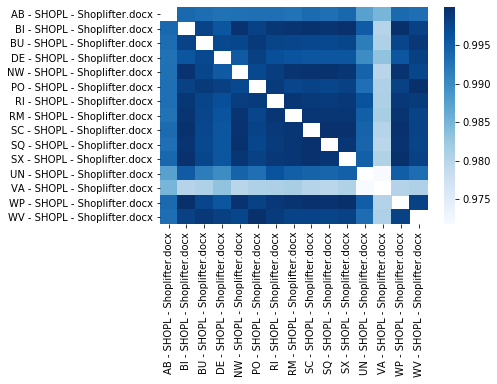

In [36]:
sns.heatmap(sim_matrix.astype(float), cmap="Blues")